### K Nearest Nieghbours Classification

1. Uses supervised learning i.e require labelled data.
2. Used to divide data into groups and then classify new datapoints on the basis of the decision boundary predictions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import make_moons, make_circles, make_classification

In [2]:
# Generating three types of datasets
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]
ds_names = ["Moons", "Circles", "Linearly Separable"]

In [3]:
# Setting up Color maps
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

Dataset: Moons


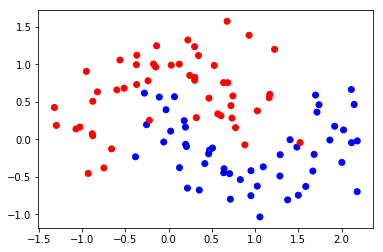

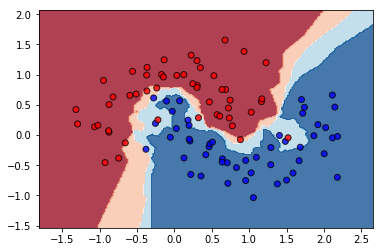

Dataset: Circles


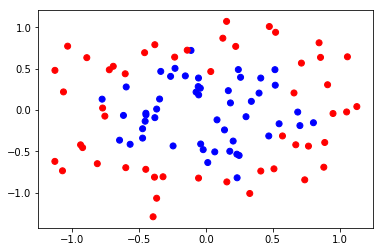

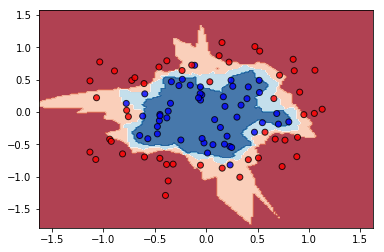

Dataset: Linearly Separable


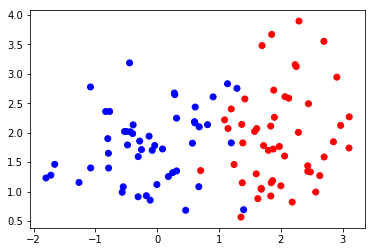

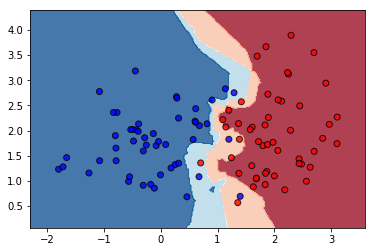

In [4]:
for name, ds in zip(ds_names, datasets):
    # Plotting the dataset
    X, y = ds
    print(f"Dataset: {name}")
    plt.scatter(X[:, 0], X[:, 1], c= y, cmap=cm_bright)
    plt.show()
    
    # Processing the data
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    clf = KNeighborsClassifier(3)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    
    # Fitting the model
    clf = KNeighborsClassifier(3)
    clf.fit(X, y)
    
    # Getting the decision boundary
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    
    # plotting the 
    plt.contourf(xx, yy, Z, cmap=cm, alpha = 0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, alpha=0.8, edgecolors='k')
    plt.show()